In [2]:
import pandas as pd


pd.set_option("display.max_columns", None)

In [3]:
path = "data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,32.0,0.085953,0,0,0,0,1,27.32,5.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,29.0,0.085953,0,1,0,0,0,19.95,5.0,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,18.0,0.085953,0,0,0,0,1,23.76,4.8,160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,41.0,0.085953,0,0,1,0,0,27.32,4.0,159,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,52.0,0.085953,1,0,0,0,0,23.75,6.5,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
from utils.evaluation import Evaluation

In [6]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import Normalizer

In [7]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

In [9]:
scale = Normalizer()
x_train_norm = scale.fit_transform(X_train)
# x_val_norm = scale.fit_transform(X_val)

In [10]:
from utils.modeling import Modeling

import warnings
warnings.filterwarnings('ignore')

In [ ]:
mlp = MLPClassifier()

grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    "activation":["identity", "logistic", "tanh", 'relu']
}

# grid = {
#     'hidden_layer_sizes': [(50,), (100,), (100, 50)],
#     "activation":["identity", "logistic", "tanh", 'relu'],
#     "solver": ["lbfgs", "sgd", "adam"],
#     'alpha': [0.0001, 0.05],
#     "learning_rate": ["constant", "invscaling", "adaptive"],
#     "learning_rate_init": [0.1, 0.001, 0.0001],
#     "max_iter": [100, 200, 1000]
# }

model = Modeling()

best_params, best_score = model.grid_search(model=mlp, param_grid=grid, cv=5, X_train=X_train, y_train=y_train)

In [10]:
# # melhorar o GridSearch
# h_neuronios = [10, 50, 100]
# f_activations = ['relu', 'logistic']
# learning_rate_init_values = [0.1, 0.001, 0.0001]
# qtd_epochs = [10, 100, 1000]


# melhor_parametros = ""
# best_model = None
# best_mean_acc = 0

# for h in h_neuronios:
#   for f in f_activations:
#     for r in learning_rate_init_values:
#       for e in qtd_epochs:

#         modelo = MLPClassifier(
#             hidden_layer_sizes = (h,), activation = f,
#             learning_rate_init = r, max_iter = e )

#         sum_acc = 0
#         for i in range(5):

#           modelo.fit(x_train_norm, y_train)
#           prev = modelo.predict(x_val_norm)
#           acc = accuracy_score(y_val, prev) * 100

#           sum_acc += acc

#         mean_acc = sum_acc/5
#         if mean_acc > best_mean_acc:
#           best_mean_acc = mean_acc
#           best_model = modelo
#           melhor_parametros = f"h:{h}-f:{f}-r:{r}-e:{e} --- ACC: {acc}"

In [11]:
# melhor_parametros

In [12]:
# best_mean_acc

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scale = Normalizer()
x_train_norm = scale.fit_transform(X_train)
x_test_norm = scale.fit_transform(X_test)

modelo = MLPClassifier(
            hidden_layer_sizes = (50), activation = 'relu',
            learning_rate_init = 0.1, max_iter = 100
            )

modelo.fit(x_train_norm, y_train)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=100)

In [14]:
prev = modelo.predict(x_test_norm)

Accuracy: 0.9574


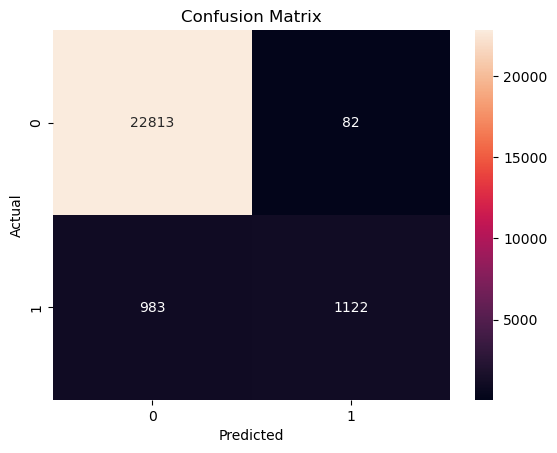

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22895
           1       0.93      0.53      0.68      2105

    accuracy                           0.96     25000
   macro avg       0.95      0.76      0.83     25000
weighted avg       0.96      0.96      0.95     25000



In [15]:
eval = Evaluation()

eval.evaluate_model(y_test, prev)

In [16]:
df.shape

(100000, 24)